## Shapefile test sandbox

This notebook contains the code used to prototype the shapefile test fixtures and tests in `test_spatial_selection.py`.

In [1]:
import geopandas as gp
from shapely.geometry import Polygon
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import regionmask
import math

from unseen import spatial_selection

In [2]:
nw = Polygon([(120, -20.25),
              (122, -20.25),
              (122, -21.75),
              (120, -21.75)
             ])

ne = Polygon([(122, -20.25),
              (125, -20.25),
              (125, -21.75),
              (122, -21.75)
             ])

sw = Polygon([(120, -21.75),
              (123, -21.75),
              (123, -23.25),
              (120, -23.25)
             ])

se = Polygon([(123, -21.75),
              (125, -21.75),
              (125, -23.25),
              (123, -23.25)
             ])

shapes = gp.GeoDataFrame({'region': ['north-west', 'north-east', 'south-west', 'south-east'],
                                      'geometry': gp.GeoSeries([nw, ne, sw, se])})
shapes

,region,geometry
0,north-west,"POLYGON ((120.00000 -20.25000, 122.00000 -20.2..."
1,north-east,"POLYGON ((122.00000 -20.25000, 125.00000 -20.2..."
2,south-west,"POLYGON ((120.00000 -21.75000, 123.00000 -21.7..."
3,south-east,"POLYGON ((123.00000 -21.75000, 125.00000 -21.7..."


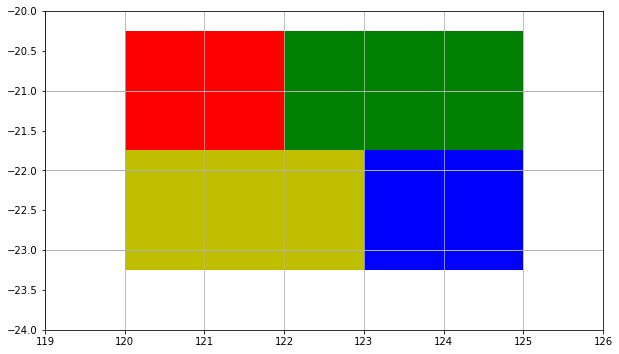

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
shapes.plot(ax=ax, color=['r', 'g', 'y', 'b'])
ax.xaxis.grid(True)
ax.axhline(-21, linewidth=1, color='0.7')
ax.axhline(-22, linewidth=1, color='0.7')
ax.axhline(-23, linewidth=1, color='0.7')
plt.xlim(119, 126)
plt.ylim(-24, -20)
plt.show()

In [4]:
data = np.reshape(np.arange(0, 7*4), [4,7])
data

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27]])

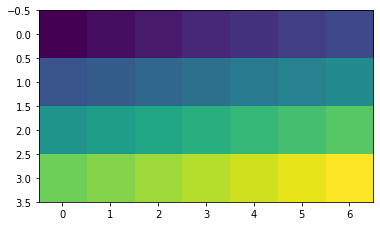

In [5]:
plt.imshow(data)
plt.show()

In [6]:
data.shape

(4, 7)

In [7]:
da = xr.DataArray(
    data,
    dims=("lat", "lon"),
    coords={
        "lat": [-23.5, -22.5, -21.5, -20.5],
        "lon": [119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5]
    }
)


In [8]:
da = da.expand_dims({'ensemble': [0,1,2]})

In [9]:
da

<xarray.DataArray (ensemble: 3, lat: 4, lon: 7)>
array([[[ 0,  1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12, 13],
        [14, 15, 16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25, 26, 27]],

       [[ 0,  1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12, 13],
        [14, 15, 16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25, 26, 27]],

       [[ 0,  1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12, 13],
        [14, 15, 16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25, 26, 27]]])
Coordinates:
  * ensemble  (ensemble) int64 0 1 2
  * lat       (lat) float64 -23.5 -22.5 -21.5 -20.5
  * lon       (lon) float64 119.5 120.5 121.5 122.5 123.5 124.5 125.5

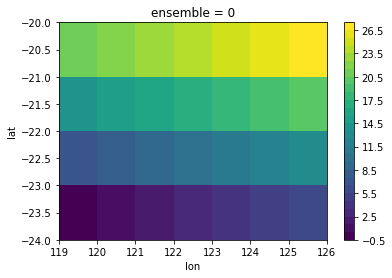

In [10]:
da.isel({'ensemble': 0}).plot(levels=np.arange(-0.5, 28, 1), cmap='viridis')
plt.show()

In [11]:
da_masked = spatial_selection.select_shapefile_regions(
    da,
    shapes,
    agg="none",
    overlap_fraction=0.5,
)

In [13]:
da_masked

<xarray.DataArray (ensemble: 3, lat: 3, lon: 5, region: 4)>
array([[[[nan, nan,  8., nan],
         [nan, nan,  9., nan],
         [nan, nan, 10., nan],
         [nan, nan, nan, 11.],
         [nan, nan, nan, 12.]],

        [[15., nan, nan, nan],
         [16., nan, nan, nan],
         [nan, 17., nan, nan],
         [nan, 18., nan, nan],
         [nan, 19., nan, nan]],

        [[22., nan, nan, nan],
         [23., nan, nan, nan],
         [nan, 24., nan, nan],
         [nan, 25., nan, nan],
         [nan, 26., nan, nan]]],


       [[[nan, nan,  8., nan],
...
         [nan, 26., nan, nan]]],


       [[[nan, nan,  8., nan],
         [nan, nan,  9., nan],
         [nan, nan, 10., nan],
         [nan, nan, nan, 11.],
         [nan, nan, nan, 12.]],

        [[15., nan, nan, nan],
         [16., nan, nan, nan],
         [nan, 17., nan, nan],
         [nan, 18., nan, nan],
         [nan, 19., nan, nan]],

        [[22., nan, nan, nan],
         [23., nan, nan, nan],
         [nan, 24., nan, nan],
         [nan, 25., nan, nan],
         [nan, 26., nan, nan]]]])
Coordinates:
  * ensemble  (ensemble) int64 0 1 2
  * lat       (lat) float64 -22.5 -21.5 -20.5
  * lon       (lon) float64 120.5 121.5 122.5 123.5 124.5
  * region    (region) int64 0 1 2 3

REGION 0
[[nan nan nan nan nan]
 [15. 16. nan nan nan]
 [22. 23. nan nan nan]]


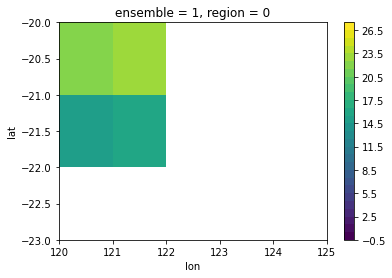

REGION 1
[[nan nan nan nan nan]
 [nan nan 17. 18. 19.]
 [nan nan 24. 25. 26.]]


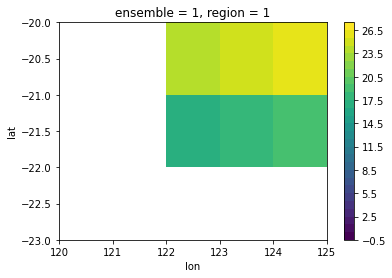

REGION 2
[[ 8.  9. 10. nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


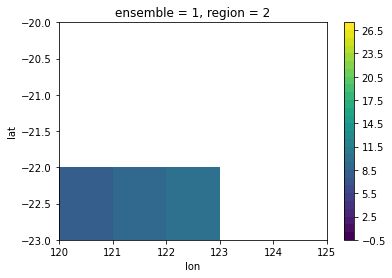

REGION 3
[[nan nan nan 11. 12.]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


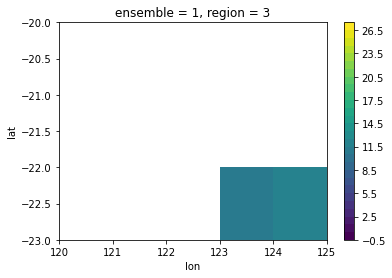

In [17]:
for region in [0, 1, 2, 3]:
    print(f'REGION {region}')
    subset = da_masked.isel({'region': region, 'ensemble': 1})
    print(subset.values)
    subset.plot(levels=np.arange(-0.5, 28, 1), cmap='viridis')
    plt.show()

In [30]:
da_agg = spatial_selection.select_shapefile_regions(
    da,
    shapes,
    agg="weighted_mean",
    overlap_fraction=0.5,
)

In [31]:
da_agg

<xarray.DataArray (ensemble: 3, region: 4)>
array([[19.01172476, 21.51172476,  9.        , 11.5       ],
       [19.01172476, 21.51172476,  9.        , 11.5       ],
       [19.01172476, 21.51172476,  9.        , 11.5       ]])
Coordinates:
  * ensemble  (ensemble) int64 0 1 2
  * region    (region) int64 0 1 2 3

In [21]:
da_agg.isel({'ensemble': 0}).values

array([ 76., 129.,  27.,  23.])

In [22]:
da_edge = spatial_selection.select_shapefile_regions(
    da,
    shapes,
    agg="none",
    overlap_fraction=0.1,
)

REGION 0
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [15. 16. nan nan nan]
 [22. 23. nan nan nan]]


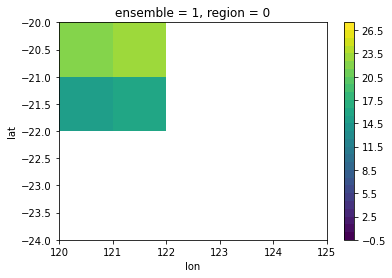

REGION 1
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan 17. 18. 19.]
 [nan nan 24. 25. 26.]]


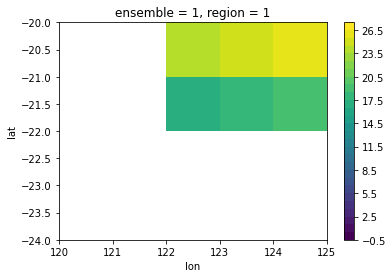

REGION 2
[[ 1.  2.  3. nan nan]
 [ 8.  9. 10. nan nan]
 [15. 16. 17. nan nan]
 [nan nan nan nan nan]]


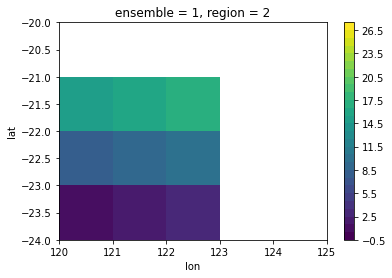

REGION 3
[[nan nan nan  4.  5.]
 [nan nan nan 11. 12.]
 [nan nan nan 18. 19.]
 [nan nan nan nan nan]]


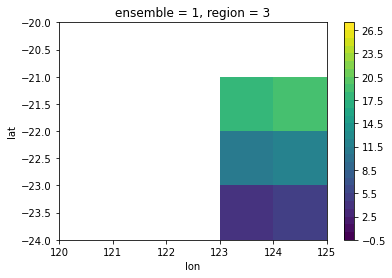

In [23]:
for region in [0, 1, 2, 3]:
    print(f'REGION {region}')
    subset = da_edge.isel({'region': region, 'ensemble': 1})
    print(subset.values)
    subset.plot(levels=np.arange(-0.5, 28, 1), cmap='viridis')
    plt.show()

In [32]:
da_agg_edge = spatial_selection.select_shapefile_regions(
    da,
    shapes,
    agg="weighted_mean",
    overlap_fraction=0.1,
)

In [33]:
da_agg_edge

<xarray.DataArray (ensemble: 3, region: 4)>
array([[19.01172476, 21.51172476,  9.03373887, 11.53373887],
       [19.01172476, 21.51172476,  9.03373887, 11.53373887],
       [19.01172476, 21.51172476,  9.03373887, 11.53373887]])
Coordinates:
  * ensemble  (ensemble) int64 0 1 2
  * region    (region) int64 0 1 2 3